In [1]:
!pip install keras==2.2.4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 312 kB 4.8 MB/s 
     |████████████████████████████████| 50 kB 5.7 MB/s 
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.9.2 requires keras<2.10.0,>=2.9.0rc0, but you have keras 2.2.4 which is incompatible.


In [2]:
!pip install tensorflow==2.5.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 454.3 MB 15 kB/s 
     |████████████████████████████████| 4.0 MB 41.1 MB/s 
     |████████████████████████████████| 462 kB 59.4 MB/s 
     |████████████████████████████████| 132 kB 46.2 MB/s 
     |████████████████████████████████| 14.8 MB 30.0 MB/s 
     |████████████████████████████████| 1.2 MB 70.6 MB/s 
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4849 sha256=1c900536968d1d4cb23e37e76962e0e468704c462cce2579b0f95eb0869dbde9
  Stored in directory: /root/.cache/pip/wheels/3f/e3/ec/8a8336ff196023622fbcb36de0c5a5c218cbb24111d1d4c7f2
  Created wheel for wrapt: filename=wrapt-1.12.1-cp37-cp37m-linux_x86_64.whl size=68717 sha256=5baa87ac9b23b231280a7259c72e35c6105ea6f5ae46f279382b3def9679cf80
  Stored in directory: /root/.cache/pip/wheels/62/76/4c/aa25851149f3f6d9785f6c869387ad82b3fd37582fa8147ac6
Successfully built term

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [3]:
x_train=train_datagen.flow_from_directory(r'/content/drive/MyDrive/Dataset/TRAIN_SET',target_size=(64, 64),batch_size=5,color_mode='rgb',class_mode='sparse')

Found 2626 images belonging to 5 classes.


In [4]:
x_test=test_datagen.flow_from_directory(r'/content/drive/MyDrive/Dataset/TEST_SET',target_size=(64, 64),batch_size=5,color_mode='rgb',class_mode='sparse')

Found 1055 images belonging to 5 classes.


In [5]:
print(x_train.class_indices)

{'APPLES': 0, 'BANANA': 1, 'ORANGE': 2, 'PINEAPPLE': 3, 'WATERMELON': 4}


In [6]:

print(x_test.class_indices)

{'APPLES': 0, 'BANANA': 1, 'ORANGE': 2, 'PINEAPPLE': 3, 'WATERMELON': 4}


In [7]:
from collections import Counter as c
c(x_train.labels)

Counter({0: 606, 1: 445, 2: 479, 3: 621, 4: 475})

In [8]:
import numpy as np
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:
model=Sequential()

In [10]:
model.add(Conv2D(32, (3, 3), input_shape=(64, 64 ,3), activation='relu'))

In [11]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [12]:
model.add(Conv2D(32, (3, 3), activation='relu'))

In [14]:
model.add(Flatten())

In [15]:
model.add(Dense(units=128, activation='relu'))

In [16]:
model.add(Dense(units=5, activation='softmax'))


In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
flatten (Flatten)            (None, 26912)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               3444864   
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 645       
Total params: 3,455,653
Trainable params: 3,455,653
Non-trainable params: 0
______________________________________________

In [18]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [19]:
model.fit_generator(x_train,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test),epochs=30)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
526/526 [==============================] - 833s 2s/step - loss: 0.1370 - accuracy: 0.9532 - val_loss: 0.0269 - val_accuracy: 0.9896
Epoch 2/30
526/526 [==============================] - 51s 98ms/step - loss: 0.0188 - accuracy: 0.9939 - val_loss: 0.3691 - val_accuracy: 0.9118
Epoch 3/30
526/526 [==============================] - 49s 93ms/step - loss: 0.0271 - accuracy: 0.9916 - val_loss: 0.0019 - val_accuracy: 1.0000
Epoch 4/30
526/526 [==============================] - 49s 94ms/step - loss: 3.1635e-04 - accuracy: 1.0000 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 5/30
526/526 [==============================] - 52s 99ms/step - loss: 1.0500e-04 - accuracy: 1.0000 - val_loss: 0.0036 - val_accuracy: 1.0000
Epoch 6/30
526/526 [==============================] - 49s 94ms/step - loss: 4.5251e-05 - accuracy: 1.0000 - val_loss: 0.0035 - val_accuracy: 1.0000
Epoch 7/30
526/526 [==============================] - 48s 90ms/step - loss: 0.0960 - accuracy: 0.9760 - val_loss: 0.0051 - va

In [21]:
 
model=model.save('nutrition.h5')

In [22]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [23]:
model = load_model("nutrition.h5")

In [36]:
img=image.load_img(r"/content/drive/MyDrive/Dataset/TEST_SET/PINEAPPLE/135_100.jpg", target_size=(64,64))

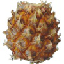

In [37]:
img

In [38]:
x=image.img_to_array(img)

In [39]:
x

array([[[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 2

In [40]:
x=np.expand_dims(x,axis=0)

In [41]:
x

array([[[[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        ...,

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
       

In [42]:
y=np.argmax(model.predict(x), axis=1)

In [43]:
y

array([3])

In [44]:
x_train.class_indices

{'APPLES': 0, 'BANANA': 1, 'ORANGE': 2, 'PINEAPPLE': 3, 'WATERMELON': 4}

In [45]:
index=['APPLES', 'BANANA', 'ORANGE', 'PINEAPPLE', 'WATERMELON']

In [46]:
index[y[0]]

'PINEAPPLE'

In [ ]:
cd /content/drive/MyDrive/I BM/Assignments

In [47]:
!tar -zcvf nutri-analyzer-model.tgz nutrition.h5

nutrition.h5
